In [1]:
import praw
import csv
from textblob import TextBlob
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay


In [2]:
user_agent= "Scraper 1.0 by /u/Sri_sindhu"
reddit = praw.Reddit(client_id='yb6Y0X85p4feXKSdd98spA',
                     client_secret='GofdmKetNok2YZxRrn3d2SaKXQ7CHA',
                     user_agent='YOUR_USER_AGENT')

In [3]:
import pandas as pd
pd.set_option('max_colwidth', None)
df = []

subreddit = reddit.subreddit('FortNiteBR')

for post in subreddit.hot(limit=1000):
    df.append([post.title, post.score, post.url, post.num_comments, post.selftext])

df = pd.DataFrame(df,columns=['title', 'score', 'url', 'num_comments', 'body'])
df

title  \
0                                                                     Galactic r/FortniteBR Senate | Choose Your Side   
1                                                    Galactic r/FortniteBR Senate | Which is the most iconic pickaxe?   
2                   If I've learned anything from this event, it's that the stormtrooper is laughably overpriced now.   
3                                                                                   I would like to see his reaction.   
4                                                    Official Fortnite CH4 concept art, designed by Ocellus Services…   
..                                                                                                                ...   
857                                                                               First RANKED win! (ZB, Solo v Duos)   
858                                             Is anyone else having trouble getting into ranked zero build matches?   
859  Hello Reddit, I've been having problems with textures in the game for months, does anyone know how I can fix it?   
860                                                                                   Has anyone else’s Maya changed?   
861                                                                                                  Free Talk Friday   

     score  \
0       75   
1       21   
2      680   
3     1475   
4     1032   
..     ...   
857     15   
858      2   
859      1   
860      0   
861      5   

                                                                                                         url  \
0         https://www.reddit.com/r/FortNiteBR/comments/13d7ruk/galactic_rfortnitebr_senate_choose_your_side/   
1        https://www.reddit.com/r/FortNiteBR/comments/13oud9r/galactic_rfortnitebr_senate_which_is_the_most/   
2                                                                        https://i.redd.it/q87c568edf1b1.jpg   
3                                                                            https://v.redd.it/fytsqai91e1b1   
4                                                                     https://www.reddit.com/gallery/13or8ir   
..                                                                                                       ...   
857                                                                          https://v.redd.it/njxmvvbuhq0b1   
858  https://www.reddit.com/r/FortNiteBR/comments/13lxq3g/is_anyone_else_having_trouble_getting_into_ranked/   
859                                                                   https://www.reddit.com/gallery/13m77l8   
860                      https://www.reddit.com/r/FortNiteBR/comments/13m776i/has_anyone_elses_maya_changed/   
861                                   https://www.reddit.com/r/FortNiteBR/comments/13lusvw/free_talk_friday/   

     num_comments  \
0             177   
1              34   
2              92   
3             118   
4              57   
..            ...   
857             5   
858             6   
859             0   
860             4   
861            14   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [4]:
kk = df.nlargest(25,["num_comments"])
kk


,title,score,url,num_comments,body
20,When did Epic make you feel the FOMO?,1504,https://i.redd.it/39psywklla1b1.png,728,
49,Am I the only maniac here who hates using backblings generally ?,2710,https://i.redd.it/54zzydbiu61b1.jpg,677,
387,Am I the only person who is annoyed that Zero Build can only play duos for Ranked?,2684,https://i.redd.it/1mbwqfs26w0b1.png,439,
510,this is peak gameplay right here. The best the game has ever been!,2503,https://v.redd.it/fcabgzyozq0b1,432,
394,"We are about 3 weeks away from next season, how did you like ch4 S2?",461,https://www.reddit.com/r/FortNiteBR/comments/13mj3lf/we_are_about_3_weeks_away_from_next_season_how/,343,"Me personally I really liked it at first but as items were added and added it got to a point I don't really enjoy playing if I'm not playing with friends.\n\n\n\nDon't get me wrong I like myself some fun items but the Katanas, the 3 different force powers, the ODM gear and now probably the spiderman mythic returning for miles is just a bit much for me.\n\n\nHowever I still feel like this season has a lot of positives, so I'd give it a solid 6/10 what are your thoughts?"
28,"Ranked Mode is by far one of the most infuriating updates in recent memory, arguably worse than Mechs and all of Chapter 2 Season 8",529,https://www.reddit.com/r/FortNiteBR/comments/13o82j2/ranked_mode_is_by_far_one_of_the_most_infuriating/,337,"Now before anyone says skill issue: I'm aware. There are games where we do extremely good and extremely bad immediately after. And that happens. But what I don't get is how harsh ranked mode is in terms of this; you can have the best game of your life to grind upwards, but if you die with zero kills just twice, all of your progress is thrown out the window. And I know I'm not the only one having this issue. Epic actually made a mode where you can't die off spawn or you lose FOURTEEN PERCENT progress. I know this is Season Zero and Epic is adjusting things still, but please make the ranking system less harsh when it comes to dying with zero kills. Better yet, you could make it like Arena where in the earlier leagues you didn't lose any points, and only from Contenders did you actually lose and make you want to grind and play the game more."
17,Hate the constant spamming!!,499,https://v.redd.it/ozc5xtpo4b1b1,335,
36,Is this legal? i was playing a signe game?,714,https://v.redd.it/018ea1xfc81b1,323,
735,Anyone else got there SpiderVerse free stuff already? For those anyone wondering how to get them all you have to do is log in to Epicgames Spiderverse website and get 40 elims to get 40 points. Best of luck to y'all,2237,https://i.redd.it/gxqe80ue3m0b1.png,303,
223,Who’s excited for a fresh weapon pool next season?,413,https://www.reddit.com/r/FortNiteBR/comments/13nb2d5/whos_excited_for_a_fresh_weapon_pool_next_season/,294,"Honestly, I’m kind of sick of the current weapons (especially the maven), and that’s one of the biggest reasons I’m so excited for next season (plus the pulse rifle will be gone). \nI’m really hoping for the “fun” guns to come back into rotation like the 2-shot shotgun or any burst weapon (plus any new weapons we get next season).\n\nWhat are you hoping for in the next season interms of loot pool?"


In [5]:
df.to_csv('df', encoding='utf-8', index=False)

In [6]:
subreddit = reddit.subreddit('FortNiteBR')
posts = subreddit.hot(limit=100)
comments = []
for post in posts:
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        comments.append(comment.body)
        

In [7]:
dfi = pd.DataFrame({'comment': comments})
dfi.to_csv('reddit2_comments.csv', index=False)
dfi

,comment
0,![gif](giphy|xTiIzJSKB4l7xTouE8)\n\nI will be watching the teams with great interest. There will be changes happening to r/FortniteBR depending on which side is winning…
1,This is awesome. Team Dark Side will win!\n\n![gif](giphy|3oKIPzLXQYb2Bn5PLG|downsized)
2,"ah, we can win my favourite thing in the whole world: v-bucks!"
3,![gif](giphy|ucXFcY1FdKaT6)
4,Making me choose between the 501 and CIS was evil lmao. Love both of them
...,...
4894,"Lol, it does look cool I can’t lie! But I’ve crashed twice now in about an hour and haven’t had that issue before so not sure it’s worth"
4895,What system are you on? If PC do you use Nvidia GeForce Experience? Have you updated your driver lately? I had a similar issue in PUBG and that really helped it!
4896,"Yeah I’m on PC, I actually just reinstalled again with direct12 shaders and it’s working again luckily"
4897,Nice! Glad you got a fix!


In [8]:
def data_processing(comment):
    comment = comment.lower()
    comment = re.sub(r"https\S+|www\S+https\S+", '',comment, flags=re.MULTILINE)
    comment = re.sub(r'\@w+|\#','',comment)
    comment = re.sub(r'[^\w\s]','',comment)
    comment_tokens = word_tokenize(comment)
    filtered_comment = [w for w in comment_tokens if not w in stop_words]
    return " ".join(filtered_comment)

In [9]:
dfi.comment = dfi['comment'].apply(data_processing)
dfi = dfi.drop_duplicates('comment')
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
dfi['comment'] = dfi['comment'].apply(lambda x: stemming(x))

C:\Users\sindh\AppData\Local\Temp\ipykernel_25576\1460639873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['comment'] = dfi['comment'].apply(lambda x: stemming(x))


In [10]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
dfi['polarity'] = dfi['comment'].apply(polarity)

C:\Users\sindh\AppData\Local\Temp\ipykernel_25576\1004142707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['polarity'] = dfi['comment'].apply(polarity)


In [11]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
dfi['sentiment'] = dfi['polarity'].apply(sentiment)

C:\Users\sindh\AppData\Local\Temp\ipykernel_25576\3795205129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['sentiment'] = dfi['polarity'].apply(sentiment)


In [12]:
dfi.head()

,comment,polarity,sentiment
0,gifgiphyxtiizjskb4l7xtoue8 watching teams great interest changes happening rfortnitebr depending side winning,0.650000,Positive
1,awesome team dark side win gifgiphy3okipzlxqyb2bn5plgdownsized,0.550000,Positive
2,ah win favourite thing whole world vbucks,0.500000,Positive
3,gifgiphyucxfcy1fdkat6,0.000000,Neutral
4,making choose 501 cis evil lmao love,0.033333,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

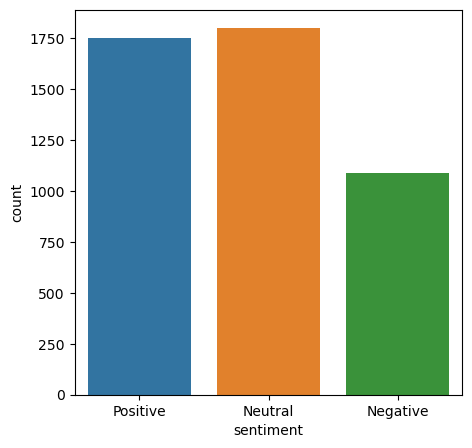

In [13]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = dfi)

In [14]:
pos_posts = dfi[dfi.sentiment == 'Positive']
pos_posts= dfi.sort_values(['polarity'], ascending= False)
pos_posts.head()

,comment,polarity,sentiment
1372,perfect inventory bro argument invalid,1.0,Positive
884,awesome shut take money,1.0,Positive
2495,play real good bro,1.0,Positive
2274,hes best grinded,1.0,Positive
237,og stormtrooper matches fortnite skill priceless,1.0,Positive


In [15]:
neg_tweets1 = dfi[dfi.sentiment == 'Negative']
#neg_tweets1= df.sort_values(['polarity'], ascending= False)
neg_tweets1

,comment,polarity,sentiment
19,separatist mean republic,-0.312500,Negative
31,made everything random,-0.500000,Negative
32,rfortnitebr currently control dark side 5183 power,-0.075000,Negative
33,rfortnitebr currently control dark side 5125 power,-0.075000,Negative
39,im sorry betray rue unless galactic empire one,-0.500000,Negative
...,...,...,...
4854,im think second wifi disconnects automatically boots game someone stay server disconnect,-0.200000,Negative
4855,waits little try reconnect instead instantly booting game probably help people bad internet,-0.321875,Negative
4859,yeah time disconnected time get back already booted granted usually seconds wouldnt help,-0.125000,Negative
4865,sorry feel like thats one random posters thats used sake poster house still com back im unsure poster teaser,-0.333333,Negative


In [16]:
subreddit = reddit.subreddit('FortNiteBR')
posts = subreddit.hot(limit=100)
all_posts = []
all_comments = []


for post in posts:
    
    all_posts.append(post)
    
    post.comments.replace_more(limit=None)
    comments = post.comments.list()
    
    for comment in comments:
        all_comments.append(comment)

#  top 5 users who have commented the most
comment_counts = {}
for comment in all_comments:
    user = comment.author
    if user not in comment_counts:
        comment_counts[user] = 1
    else:
        comment_counts[user] += 1

top_users = sorted(comment_counts.items(), key=lambda x: x[1], reverse=True)[:5]

In [17]:
dft = pd.DataFrame({'top': top_users})
dft.to_csv('top__users.csv', index=False)
dft

,top
0,"(ogg_ogg, 77)"
1,"(Spear_speaks007, 61)"
2,"(barneycool, 42)"
3,"(frogiscat, 33)"
4,"(NoV-Bucks4u, 30)"


In [18]:
user = reddit.redditor('ogg_ogg')

#  the 25 most recent comments of the user
commentstop = user.comments.new(limit=25)

#  list to store the comments
comment_list = []


for comment in commentstop:
    comment_list.append([comment.body])
    text=comment.body
    


In [19]:
dftop = pd.DataFrame({'topcomment': comment_list})
dftop.to_csv('reddittopuser_comments.csv', index=False)
dftop

,topcomment
0,"[I'm missing the lightsaber already, but we move regardless]"
1,[Op plays real good]
2,[![gif](giphy|6UFgdU9hirj1pAOJyN)]
3,[Never underestimate the force power Lol]
4,[W assassin creed\n\n![gif](giphy|2y4ajXjCJkXGU)]
5,[-3500]
6,"[This is awesome bro, I love the first outfit and the staff\n\n*shut up and take my money*]"
7,"[No, I love this collab and the lightsaber Is so awesome to use]"
8,[This is the only collab I enjoyed most ngl]
9,[Nice]


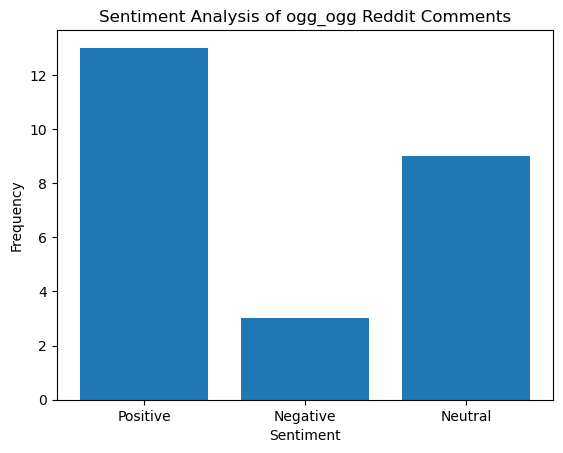

In [21]:
user = reddit.redditor('ogg_ogg')
comments = user.comments.new(limit=25)
positive = 0
negative = 0
neutral = 0

for comment in comments:
    text = comment.body
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    if score > 0:
        positive += 1
    elif score < 0:
        negative += 1
    else:
        neutral += 1

labels = ['Positive', 'Negative', 'Neutral']
values = [positive, negative, neutral]
plt.bar(labels, values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of ogg_ogg Reddit Comments')
plt.show()

In [22]:
unique_users = set(comment.author for comment in all_comments)


In [23]:
# each user's sentiment score and comment count
user_sentiment = {}
for user in unique_users:
    user_comments = [comment.body for comment in all_comments if comment.author == user]
    sentiment_scores = [TextBlob(comment).sentiment.polarity for comment in user_comments]
    sentiment_score = sum(sentiment_scores)
    comment_count = len(user_comments)
    user_sentiment[user] = (sentiment_score, comment_count)

In [24]:
# sentiment score 
sorted_users = sorted(user_sentiment.items(), key=lambda x: x[1][0])
top_negative_users = (sorted_users[:50])
top_positive_users = (sorted_users[-50:])

In [25]:
top_users_comments = []
for user, _ in top_negative_users + top_positive_users:
    user_comments = [comment for comment in all_comments if comment.author == user]
    user_comments_sorted = sorted(user_comments, key=lambda x: x.created_utc, reverse=True)[:50]
    top_users_comments.extend(user_comments_sorted)

In [26]:
# sentiment score for each user's comments
user_top_sentiment = {}
for user, _ in top_negative_users + top_positive_users:
    user_comments = [comment.body for comment in top_users_comments if comment.author == user]
    sentiment_scores = [TextBlob(comment).sentiment.polarity for comment in user_comments]
    sentiment_score = sum(sentiment_scores)
    user_top_sentiment[user] = sentiment_score / len(user_comments)

In [27]:
print(len(unique_users))

2721


In [28]:
print(f"Top 50 most negative users: {[user for user, _ in top_negative_users]}")

Top 50 most negative users: [Redditor(name='LevsRedfield'), Redditor(name='FadedFigure'), Redditor(name='aaronhereee'), Redditor(name='Alacan27'), Redditor(name='Hypernova-enjoyer'), Redditor(name='random-default-8'), Redditor(name='The_Traveller__'), Redditor(name='socco51'), Redditor(name='Dependent_Buy_9641'), Redditor(name='Chris908'), Redditor(name='5in1K'), Redditor(name='DeadlyCyclone'), Redditor(name='SurrogateTurtle'), Redditor(name='MaskedRiderFaiz'), Redditor(name='RedRumRaisins'), Redditor(name='Lord_Despairagus'), Redditor(name='WhooshDatJoosh'), Redditor(name='GERMA90'), Redditor(name='emotx'), Redditor(name='128Gigabytes'), Redditor(name='Shinysuitman666'), Redditor(name='Drakeskulled_Reaper'), Redditor(name='PaperXenomorphBag'), Redditor(name='PeelySucks'), Redditor(name='DeroZaza'), Redditor(name='Constant_Milk_3579'), Redditor(name='Over_Perception1705'), Redditor(name='Blergblum'), Redditor(name='MISTAsoul12'), Redditor(name='_H4nzo_'), Redditor(name='DerrBenja'), Re

In [57]:
print("Top 50 most Negative users:")
for user, _ in top_negative_users:
    print(user)

Top 50 most Negative users:
LevsRedfield
FadedFigure
aaronhereee
Alacan27
Hypernova-enjoyer
random-default-8
The_Traveller__
socco51
Dependent_Buy_9641
Chris908
5in1K
DeadlyCyclone
SurrogateTurtle
MaskedRiderFaiz
RedRumRaisins
Lord_Despairagus
WhooshDatJoosh
GERMA90
emotx
128Gigabytes
Shinysuitman666
Drakeskulled_Reaper
PaperXenomorphBag
PeelySucks
DeroZaza
Constant_Milk_3579
Over_Perception1705
Blergblum
MISTAsoul12
_H4nzo_
DerrBenja
AstralSaiyn
problematikUAV
tweakyloco
ElSuperbisto
sikotic4life
YoungBlueJ
Kelsier_z_cajnika
TheLittleSpider
Einear
WatDouMean765
DanfordThePom
TheMaslankaDude
Decades101
saintmesss
Jashwha
DashSatan
Olsepulsen
Galaxymagician
NickTDesigns


In [29]:
print(f"Top 50 most positive users: {[user for user, _ in top_positive_users]}")

Top 50 most positive users: [Redditor(name='EnderMightYT714'), Redditor(name='hertwij'), Redditor(name='kindtheking9'), Redditor(name='BigLongFootDoctor'), Redditor(name='UncommonTheIdk'), Redditor(name='QuiteQuietQat'), Redditor(name='2tec'), Redditor(name='Mr_Phishe'), Redditor(name='Stevie22wonder'), Redditor(name='Joel-winter'), Redditor(name='cereal_killah_1980'), Redditor(name='TGIToast'), Redditor(name='FoundationFN'), Redditor(name='AnythingFront8156'), Redditor(name='TheBlueCrystalChef'), Redditor(name='LuckyHare87'), Redditor(name='Kamil574'), Redditor(name='Maister654'), Redditor(name='CYBORG3005'), Redditor(name='ghostofharrenhal1'), Redditor(name='Alderiuz'), Redditor(name='Axxam'), Redditor(name='DBRiMatt'), Redditor(name='camcrusha'), Redditor(name='jannickBhxld'), Redditor(name='Unable_Background01'), Redditor(name='Mr_Pyrowiz'), Redditor(name='DGX_Eclispe'), Redditor(name='OKgamer01'), Redditor(name='JoeAzlz'), Redditor(name='Malixshak'), Redditor(name='NightValeScorpi

In [55]:
print("Top 50 most positive users:")
for user, _ in top_positive_users:
    print(user)


Top 50 most positive users:
EnderMightYT714
hertwij
kindtheking9
BigLongFootDoctor
UncommonTheIdk
QuiteQuietQat
2tec
Mr_Phishe
Stevie22wonder
Joel-winter
cereal_killah_1980
TGIToast
FoundationFN
AnythingFront8156
TheBlueCrystalChef
LuckyHare87
Kamil574
Maister654
CYBORG3005
ghostofharrenhal1
Alderiuz
Axxam
DBRiMatt
camcrusha
jannickBhxld
Unable_Background01
Mr_Pyrowiz
DGX_Eclispe
OKgamer01
JoeAzlz
Malixshak
NightValeScorpion
InfiniteOcto
Silkysocks777
momilije
Beorn_The_Bear
neuro__ghost
godsibi
Kitsuneyyyy
DJVinylJerk
FunnyCobra002
Skketchyboi1
lordciders
Roin-da-Groin
LivingFondant1419
NoV-Bucks4u
frogiscat
Xenc
Spear_speaks007
ogg_ogg


In [30]:
print("Sentiment score for each user's comments:")
for user, sentiment_score in user_top_sentiment.items():
    print(f"{user}: {sentiment_score:.2f}")

Sentiment score for each user's comments:
LevsRedfield: -0.54
FadedFigure: -0.19
aaronhereee: -0.25
Alacan27: -0.47
Hypernova-enjoyer: -0.19
random-default-8: -0.32
The_Traveller__: -0.32
socco51: -0.62
Dependent_Buy_9641: -0.08
Chris908: -0.14
5in1K: -0.26
DeadlyCyclone: -1.00
SurrogateTurtle: -1.00
MaskedRiderFaiz: -1.00
RedRumRaisins: -0.14
Lord_Despairagus: -0.31
WhooshDatJoosh: -0.29
GERMA90: -0.07
emotx: -0.85
128Gigabytes: -0.17
Shinysuitman666: -0.21
Drakeskulled_Reaper: -0.41
PaperXenomorphBag: -0.40
PeelySucks: -0.80
DeroZaza: -0.80
Constant_Milk_3579: -0.80
Over_Perception1705: -0.80
Blergblum: -0.80
MISTAsoul12: -0.80
_H4nzo_: -0.80
DerrBenja: -0.80
AstralSaiyn: -0.80
problematikUAV: -0.80
tweakyloco: -0.20
ElSuperbisto: -0.38
sikotic4life: -0.75
YoungBlueJ: -0.75
Kelsier_z_cajnika: -0.75
TheLittleSpider: -0.75
Einear: -0.75
WatDouMean765: -0.75
DanfordThePom: -0.38
TheMaslankaDude: -0.75
Decades101: -0.75
saintmesss: -0.75
Jashwha: -0.75
DashSatan: -0.75
Olsepulsen: -0.75


In [31]:
import matplotlib.pyplot as plt

In [32]:
def get_posts(FortNiteBR, n):
    subreddit = reddit.subreddit(FortNiteBR)
    posts_list = [] 
    
    for submission in subreddit.top(limit=n):
        info_list = []
        info_list.append(submission.id)  
        info_list.append(submission.score) 
        info_list.append(str(submission.author)) 
        info_list.append(submission.num_comments)
        info_list.append(submission.subreddit)
        posts_list.append(info_list)
    
    a = sorted(posts_list, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(a, columns = ['id', 'score', 'author', 'num_comments', 'subreddit'])
    return posts_df

In [33]:
fortnite_df = get_posts('FortNiteBR', 500)

In [34]:
fortnite_df.author.nunique() 

416

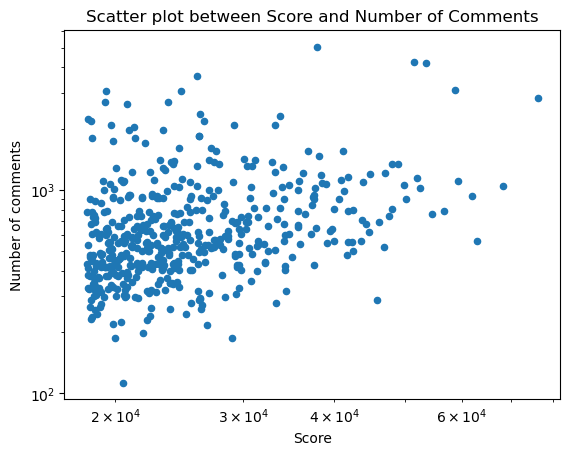

In [35]:
ax = fortnite_df.plot('score', 'num_comments', kind = 'scatter',logx=True, logy=True, title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments")
plt.savefig("ScatterPlot",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [36]:
repeating = fortnite_df[fortnite_df.duplicated(['author'], keep = False)] # users who posted more than once

In [37]:
repeating = repeating[repeating.author != 'None']

In [38]:
repeating.author.nunique() # Out of 500 posts, this is the amount of people who posted more than once 

30

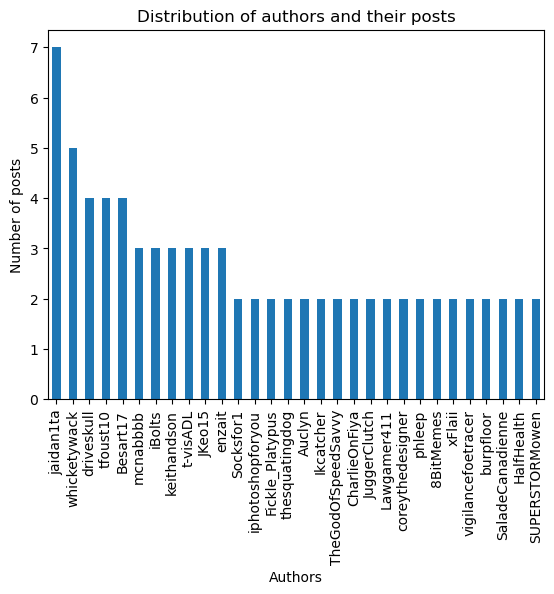

In [39]:
ax = repeating.author.value_counts().plot(kind='bar',title='Distribution of authors and their posts') 
ax.set(xlabel="Authors", ylabel="Number of posts")
plt.savefig("Bargraph",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [40]:
#  list of authors that appeared more than once on subreddit's top of all times 
u_authors = list(repeating.author.unique()) 

In [41]:
u_authors

['Fickle_Platypus',
 'phleep',
 'tfoust10',
 'HalfHealth',
 'whicketywack',
 'SaladeCanadienne',
 'burpfloor',
 't-visADL',
 'vigilancefoetracer',
 'mcnabbbb',
 'xFlaii',
 'enzait',
 '8BitMemes',
 'driveskull',
 'JKeo15',
 'JuggerClutch',
 'coreythedesigner',
 'keithandson',
 'Lawgamer411',
 'Besart17',
 'CharlieOnFiya',
 'Socksfor1',
 'iphotoshopforyou',
 'jaidan1ta',
 'thesquatingdog',
 'Auclyn',
 'Ikcatcher',
 'TheGodOfSpeedSavvy',
 'iBolts',
 'SUPERSTORMowen']

In [42]:
def get_user_posts(author, n):
    
    redditor = reddit.redditor(author)
    user_posts_list = []
    
    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(submission.id)
        info_list.append(submission.score)
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(str(submission.subreddit))
        user_posts_list.append(info_list)
    
    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df 

In [43]:
authors_df =  pd.DataFrame() 
authors_df = authors_df.fillna(0)
for u in u_authors: # Loops through every "influencer" user and gets 10 top posts per user
    c = get_user_posts(u, 10)
    authors_df = pd.concat([authors_df, c]) 
authors_df = authors_df.rename(index=str, #renaming column names 
                               columns={0: "id", 1: "score", 2: "author", 3: "num_comments", 4: "subreddit"})

In [44]:
authors_df.head(10) # Dataframe of other subreddits where authors posted 

,id,score,author,num_comments,subreddit
0,8avh0p,68266,Fickle_Platypus,1050,FortNiteBR
1,9e2j5f,19851,Fickle_Platypus,218,FortNiteBR
2,9diatk,17636,Fickle_Platypus,450,FortNiteBR
3,a56h1f,14475,Fickle_Platypus,625,FortNiteBR
4,auvoxu,12057,Fickle_Platypus,379,apexlegends
5,8g0xxn,11505,Fickle_Platypus,255,FortNiteBR
6,8swqfn,10903,Fickle_Platypus,339,FortNiteBR
7,90ztt0,8289,Fickle_Platypus,279,FortNiteBR
8,g10lc4,7972,Fickle_Platypus,197,VALORANT
9,93mker,7675,Fickle_Platypus,273,FortNiteBR


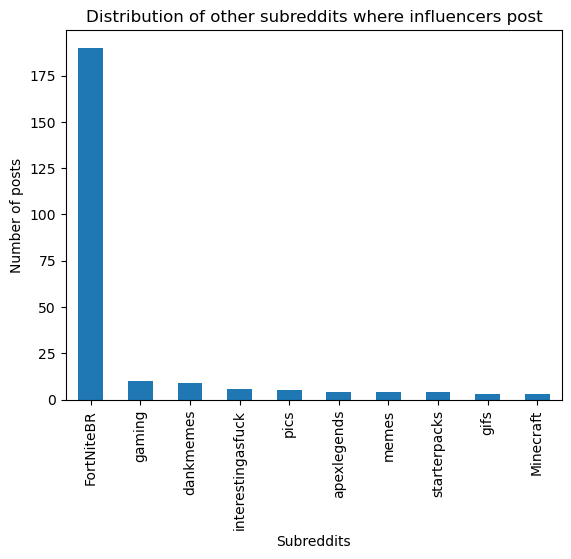

In [45]:
counts = authors_df['subreddit'].value_counts() 
# Only plot the subreddits that appear more than twice
ax = authors_df[authors_df['subreddit'].isin(counts[counts > 2].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of other subreddits where influencers post') 
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("BargraphSubreddits",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [46]:
n_df = authors_df[['author', 'subreddit']] 
n_df.head()

,author,subreddit
0,Fickle_Platypus,FortNiteBR
1,Fickle_Platypus,FortNiteBR
2,Fickle_Platypus,FortNiteBR
3,Fickle_Platypus,FortNiteBR
4,Fickle_Platypus,apexlegends


In [47]:
subs = list(n_df.subreddit.unique()) # list of unique subreddits to use in network graph 

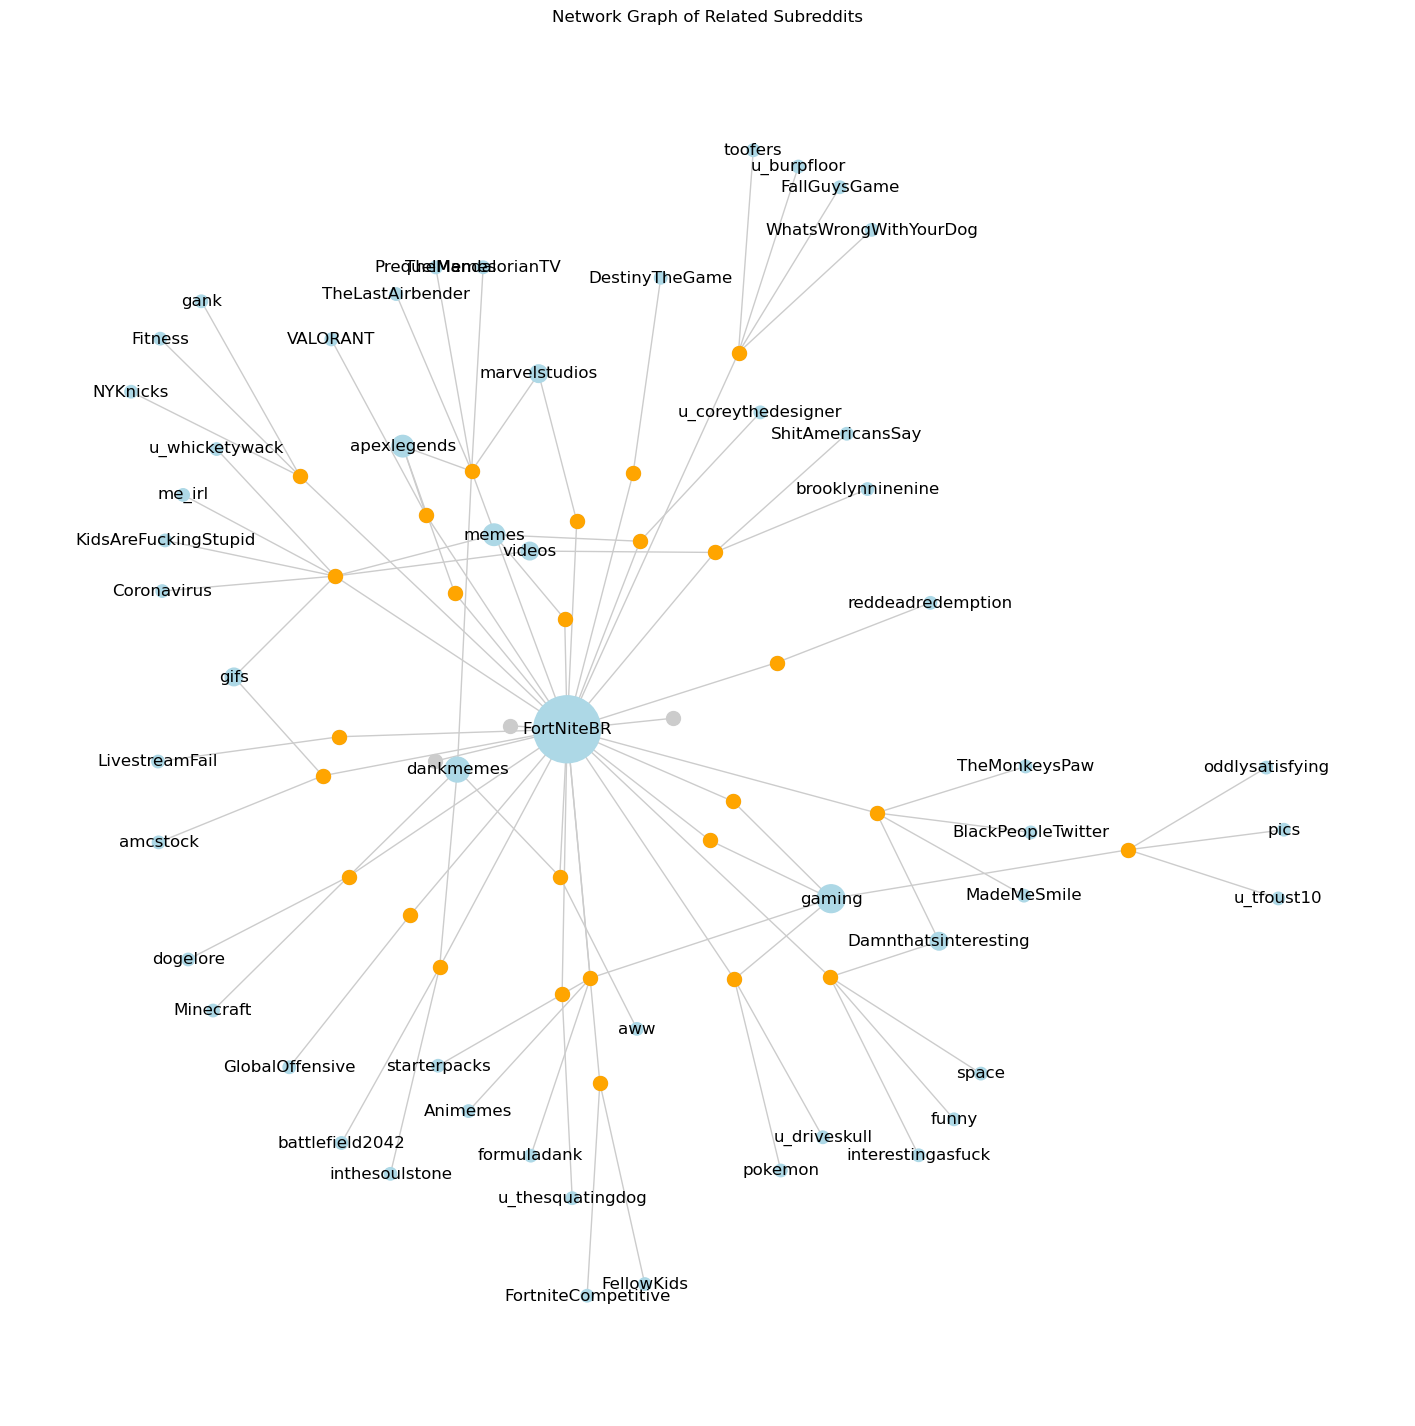

In [48]:
import networkx as nx
plt.figure(figsize=(18, 18))

#  graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') 

layout = nx.spring_layout(g,iterations=50,scale=2)


# Influencers appear small and grey
# Subreddits appear in blue and sized 
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors, node_color='#cccccc', node_size=100)

# highly connected influencers 
popular_people = [person for person in u_authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()


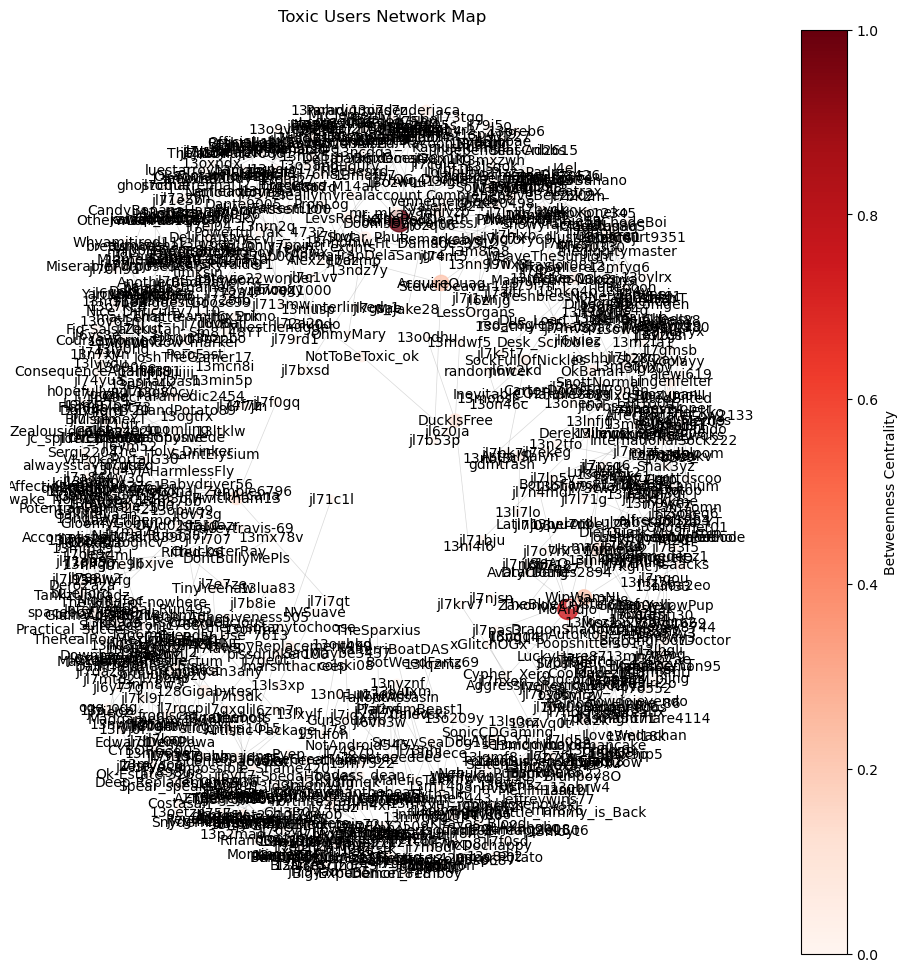

In [49]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.sentiment import SentimentIntensityAnalyzer

# Set up credentials to access the Reddit API
user_agent= "Scraper 1.0 by /u/Sri_sindhu"
reddit = praw.Reddit(client_id='yb6Y0X85p4feXKSdd98spA',
                     client_secret='GofdmKetNok2YZxRrn3d2SaKXQ7CHA',
                     user_agent='YOUR_USER_AGENT')

subreddit = reddit.subreddit('FortNiteBR')

# Retrieve subreddit data and preprocess the comments and posts
comments = []
posts = []

for comment in subreddit.comments(limit=None):
    comments.append({'id': comment.id, 'author': comment.author.name, 'timestamp': comment.created_utc, 'text': comment.body})

for post in subreddit.new(limit=None):
    posts.append({'id': post.id, 'author': post.author.name, 'timestamp': post.created_utc, 'text': post.title})

# Define sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Perform sentiment analysis on comments and posts and create a network graph
toxic_users = set()
toxic_edges = []

for comment in comments:
    sentiment_score = get_sentiment_score(comment['text'])
    if sentiment_score < 0:
        toxic_users.add(comment['author'])
        toxic_edges.append((comment['author'], comment['id']))

for post in posts:
    sentiment_score = get_sentiment_score(post['text'])
    if sentiment_score < 0:
        toxic_users.add(post['author'])
        toxic_edges.append((post['author'], post['id']))

toxic_users = list(toxic_users)  # Convert to list for indexing

# Create the network graph
G = nx.Graph()
G.add_edges_from(toxic_edges)

# Remove isolated nodes (users with no connections)
G.remove_nodes_from(list(nx.isolates(G)))

# Calculate node sizes based on degree centrality
node_sizes = [30 * G.degree(node) for node in G.nodes()]

# Calculate node colors based on betweenness centrality
node_colors = [nx.betweenness_centrality(G)[node] for node in G.nodes()]

# Calculate edge widths based on the number of comments/posts
edge_widths = [0.5 + 2 * len(G.get_edge_data(edge[0], edge[1])) for edge in G.edges()]

# Draw the network graph
pos = nx.spring_layout(G, k=0.2, seed=42)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='Reds', alpha=0.8)
edges = nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.axis('off')
plt.title('Toxic Users Network Map')

# Create a dummy scatter plot for the colorbar
sm = cm.ScalarMappable(cmap='Reds')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Betweenness Centrality')

plt.show()


In [18]:
print("Toxic Users:")
for user_type in toxic_users:
    print(user_type)

Toxic Users:
paradoxnot
eckisdee
Negative_Pianist9796
Lynched_Boi
vandilx
BfoCrazy
crixus128
EverreadySC
lackoo20
dawolf05
crazycheese3333
TheStickySpot
tea_baggins69
Bwaarone
GifanTheWoodElf
LavishnessNo1097
IGT_Metarai
ImFroxyy
bologna_jules
gold_gustin04
MattyIce6969
OneMaddHatter
nocookies4memes
Ragegamer4000
DoktorDome
DutchSimba
Morvack
BumbleBeePL
OofDabOofing
lagmuch24
Calairoth
Unreal-Memes
berlinito
Vixenz_Flare
PineX8
Secure_Archer_191
codemonsty
0ctoxVela
jackcatalyst
Quancum
NotA-Spy
epicgaming038
realmemlord
TheIceCreamSeller
GearedDimension
oooompsyy
Capitan_Capital
Tuckerballs
j_o_t_c_h
KenobiBen87
cherlesmrr
MyToastIsStolen
Maleficent-Dog6775
Parruman
thegamerhpxp
tdotpromotions
Such_Moon19
Adr3L_765
JDawgCrazE
BRAYDENDAKIDD
dannyday10700
Fair-Masterpiece-695
Educational_Term_436
CoolRunnins212
narco519
Snarl_II
WhyAreAllNamesTakenL
Lingenfelter
ThiccDicknNutSauce
storms_55
fishcalledbob
Pot4t0l0rd
Geist_Adamant
Lateralization
Legobrick27
FunnyCobra002
selva_roshan
cam

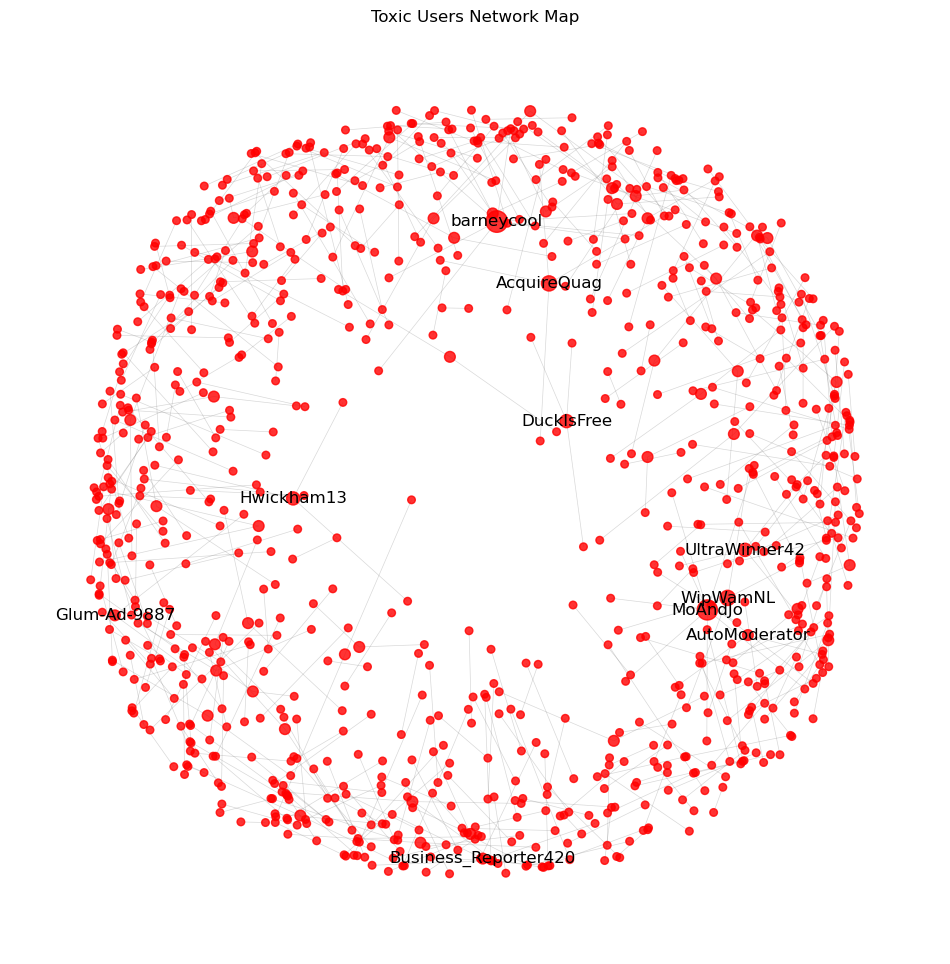

In [50]:
G = nx.Graph()
G.add_edges_from(toxic_edges)

# Remove isolated nodes (users with no connections)
G.remove_nodes_from(list(nx.isolates(G)))

# Calculate node sizes based on degree centrality
node_sizes = [30 * G.degree[node] for node in G.nodes()]

# Calculate edge widths based on the number of comments/posts
edge_widths = [0.5 + 2 * len(G.get_edge_data(edge[0], edge[1])) for edge in G.edges()]

# Sort nodes based on degree centrality
sorted_nodes = sorted(G.nodes(), key=lambda node: G.degree[node], reverse=True)

# Take the top 10 nodes with more connections
top_nodes = sorted_nodes[:10]

# Create a dictionary to map node labels
node_labels = {node: node if node in top_nodes else '' for node in G.nodes()}

# Draw the network graph
pos = nx.spring_layout(G, k=0.2, seed=42)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='red', alpha=0.8)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3, edge_color='gray')
plt.axis('off')
plt.title('Toxic Users Network Map')
plt.show()


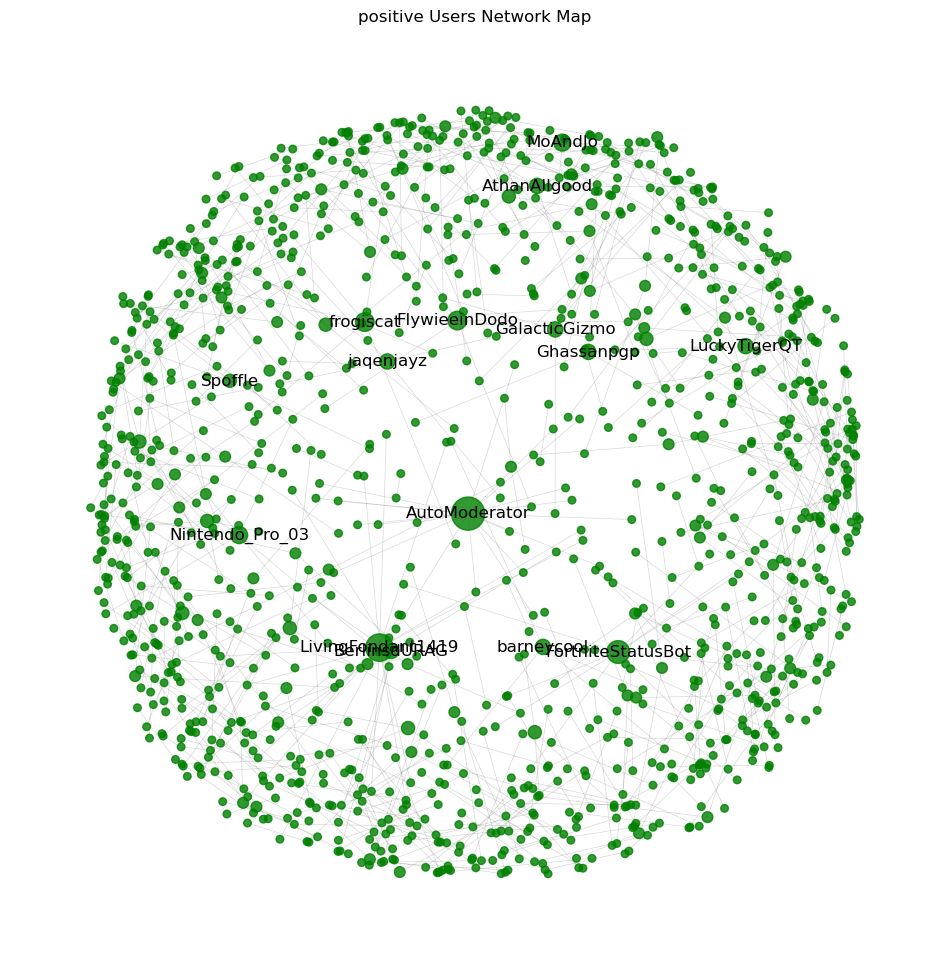

In [54]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.sentiment import SentimentIntensityAnalyzer

# Set up credentials to access the Reddit API
user_agent= "Scraper 1.0 by /u/Sri_sindhu"
reddit = praw.Reddit(client_id='yb6Y0X85p4feXKSdd98spA',
                     client_secret='GofdmKetNok2YZxRrn3d2SaKXQ7CHA',
                     user_agent='YOUR_USER_AGENT')

subreddit = reddit.subreddit('FortNiteBR')

# Retrieve subreddit data and preprocess the comments and posts
comments = []
posts = []

for comment in subreddit.comments(limit=None):
    comments.append({'id': comment.id, 'author': comment.author.name, 'timestamp': comment.created_utc, 'text': comment.body})

for post in subreddit.new(limit=None):
    posts.append({'id': post.id, 'author': post.author.name, 'timestamp': post.created_utc, 'text': post.title})

# Define sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Perform sentiment analysis on comments and posts and create a network graph
toxic_users = set()
toxic_edges = []

for comment in comments:
    sentiment_score = get_sentiment_score(comment['text'])
    if sentiment_score > 0:
        toxic_users.add(comment['author'])
        toxic_edges.append((comment['author'], comment['id']))

for post in posts:
    sentiment_score = get_sentiment_score(post['text'])
    if sentiment_score > 0:
        toxic_users.add(post['author'])
        toxic_edges.append((post['author'], post['id']))

toxic_users = list(toxic_users) 
G = nx.Graph()
G.add_edges_from(toxic_edges)

# Remove isolated nodes (users with no connections)
G.remove_nodes_from(list(nx.isolates(G)))

# Calculate node sizes based on degree centrality
node_sizes = [30 * G.degree[node] for node in G.nodes()]

# Calculate edge widths based on the number of comments/posts
edge_widths = [0.5 + 2 * len(G.get_edge_data(edge[0], edge[1])) for edge in G.edges()]

# Sort nodes based on degree centrality
sorted_nodes = sorted(G.nodes(), key=lambda node: G.degree[node], reverse=True)

# Take the top 10 nodes with more connections
top_nodes = sorted_nodes[:15]

# Create a dictionary to map node labels
node_labels = {node: node if node in top_nodes else '' for node in G.nodes()}

# Draw the network graph
pos = nx.spring_layout(G, k=0.2, seed=42)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='green', alpha=0.8)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3, edge_color='gray')
plt.axis('off')
plt.title('positive Users Network Map')
plt.show()